In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("./Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.replace({"Male": 1, "Female": 0}, inplace=True)

In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


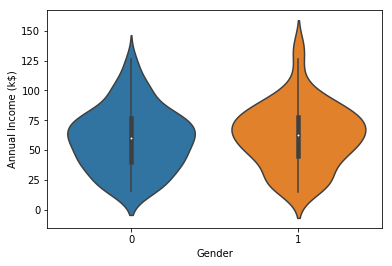

In [11]:
_ = sns.violinplot(x="Gender", y="Annual Income (k$)", data=data, split=True)

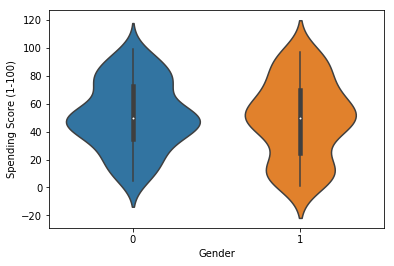

In [10]:
_ = sns.violinplot(x="Gender", y="Spending Score (1-100)", data=data)

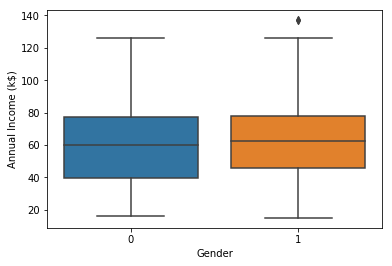

In [12]:
_ = sns.boxplot(x="Gender", y="Annual Income (k$)", data=data)

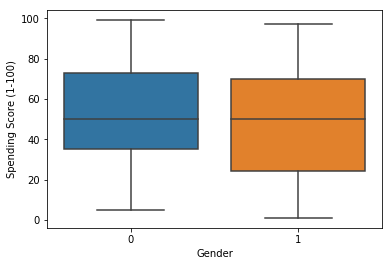

In [13]:
_ = sns.boxplot(x="Gender", y="Spending Score (1-100)", data=data)

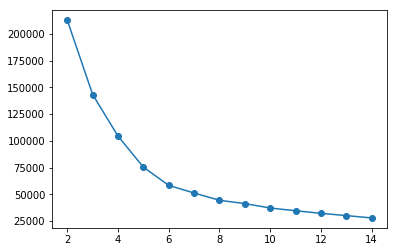

In [26]:
from sklearn.cluster import KMeans

intertia = []

for i in range(2, 15):
    alg = KMeans(n_clusters=i)
    _ = alg.fit_predict(data.drop(columns=["CustomerID"]))
    intertia.append(alg.inertia_)
plt.plot(range(2, 15), intertia, 'o-')

In [25]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=3, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=3, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

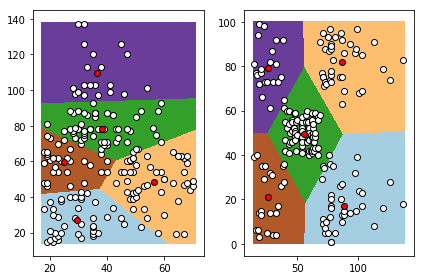

In [43]:
km = KMeans(n_clusters=5, n_jobs=3)

for idx, col in enumerate([["Age", "Annual Income (k$)"], ["Annual Income (k$)", "Spending Score (1-100)"]]):
    X = data[col].values
    km.fit(X)
    
    xx_min, xx_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    yy_min, yy_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(xx_min, xx_max, 0.02), np.arange(yy_min, yy_max, 0.02))
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
#     _ = plt.figure(figsize=(10,7))
    _ = plt.subplot(1,2,idx+1)
    _ = plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    _ = plt.scatter(X[:, 0], X[:, 1], c='w', edgecolors='k')
    _ = plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='r', edgecolors='k')
    
# plt.scatter()
plt.tight_layout()